In [ ]:
!unzip /content/drive/MyDrive/Dataset-20250223T163533Z-001.zip -d /content/drive/MyDrive/Dataset/

Archive:  /content/drive/MyDrive/Dataset-20250223T163533Z-001.zip
  inflating: /content/drive/MyDrive/Dataset/Dataset/classes.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/train/labels.cache  
  inflating: /content/drive/MyDrive/Dataset/Dataset/coco128.yaml  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new94.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/images/new94.jpg  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new137.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/images/new137.jpg  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new41.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new47.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new74.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new89.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset/val/labels/new80.txt  
  inflating: /content/drive/MyDrive/Dataset/Dataset

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
!ls

Dataset


In [ ]:
%cd /content/drive/MyDrive/Dataset

!yolo task=detect mode=train model=yolov8s.pt data=coco128.yaml epochs=30 imgsz=640 plots=True

/content/drive/MyDrive/Dataset
100% 21.5M/21.5M [00:00<00:00, 167MB/s]
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=coco128.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

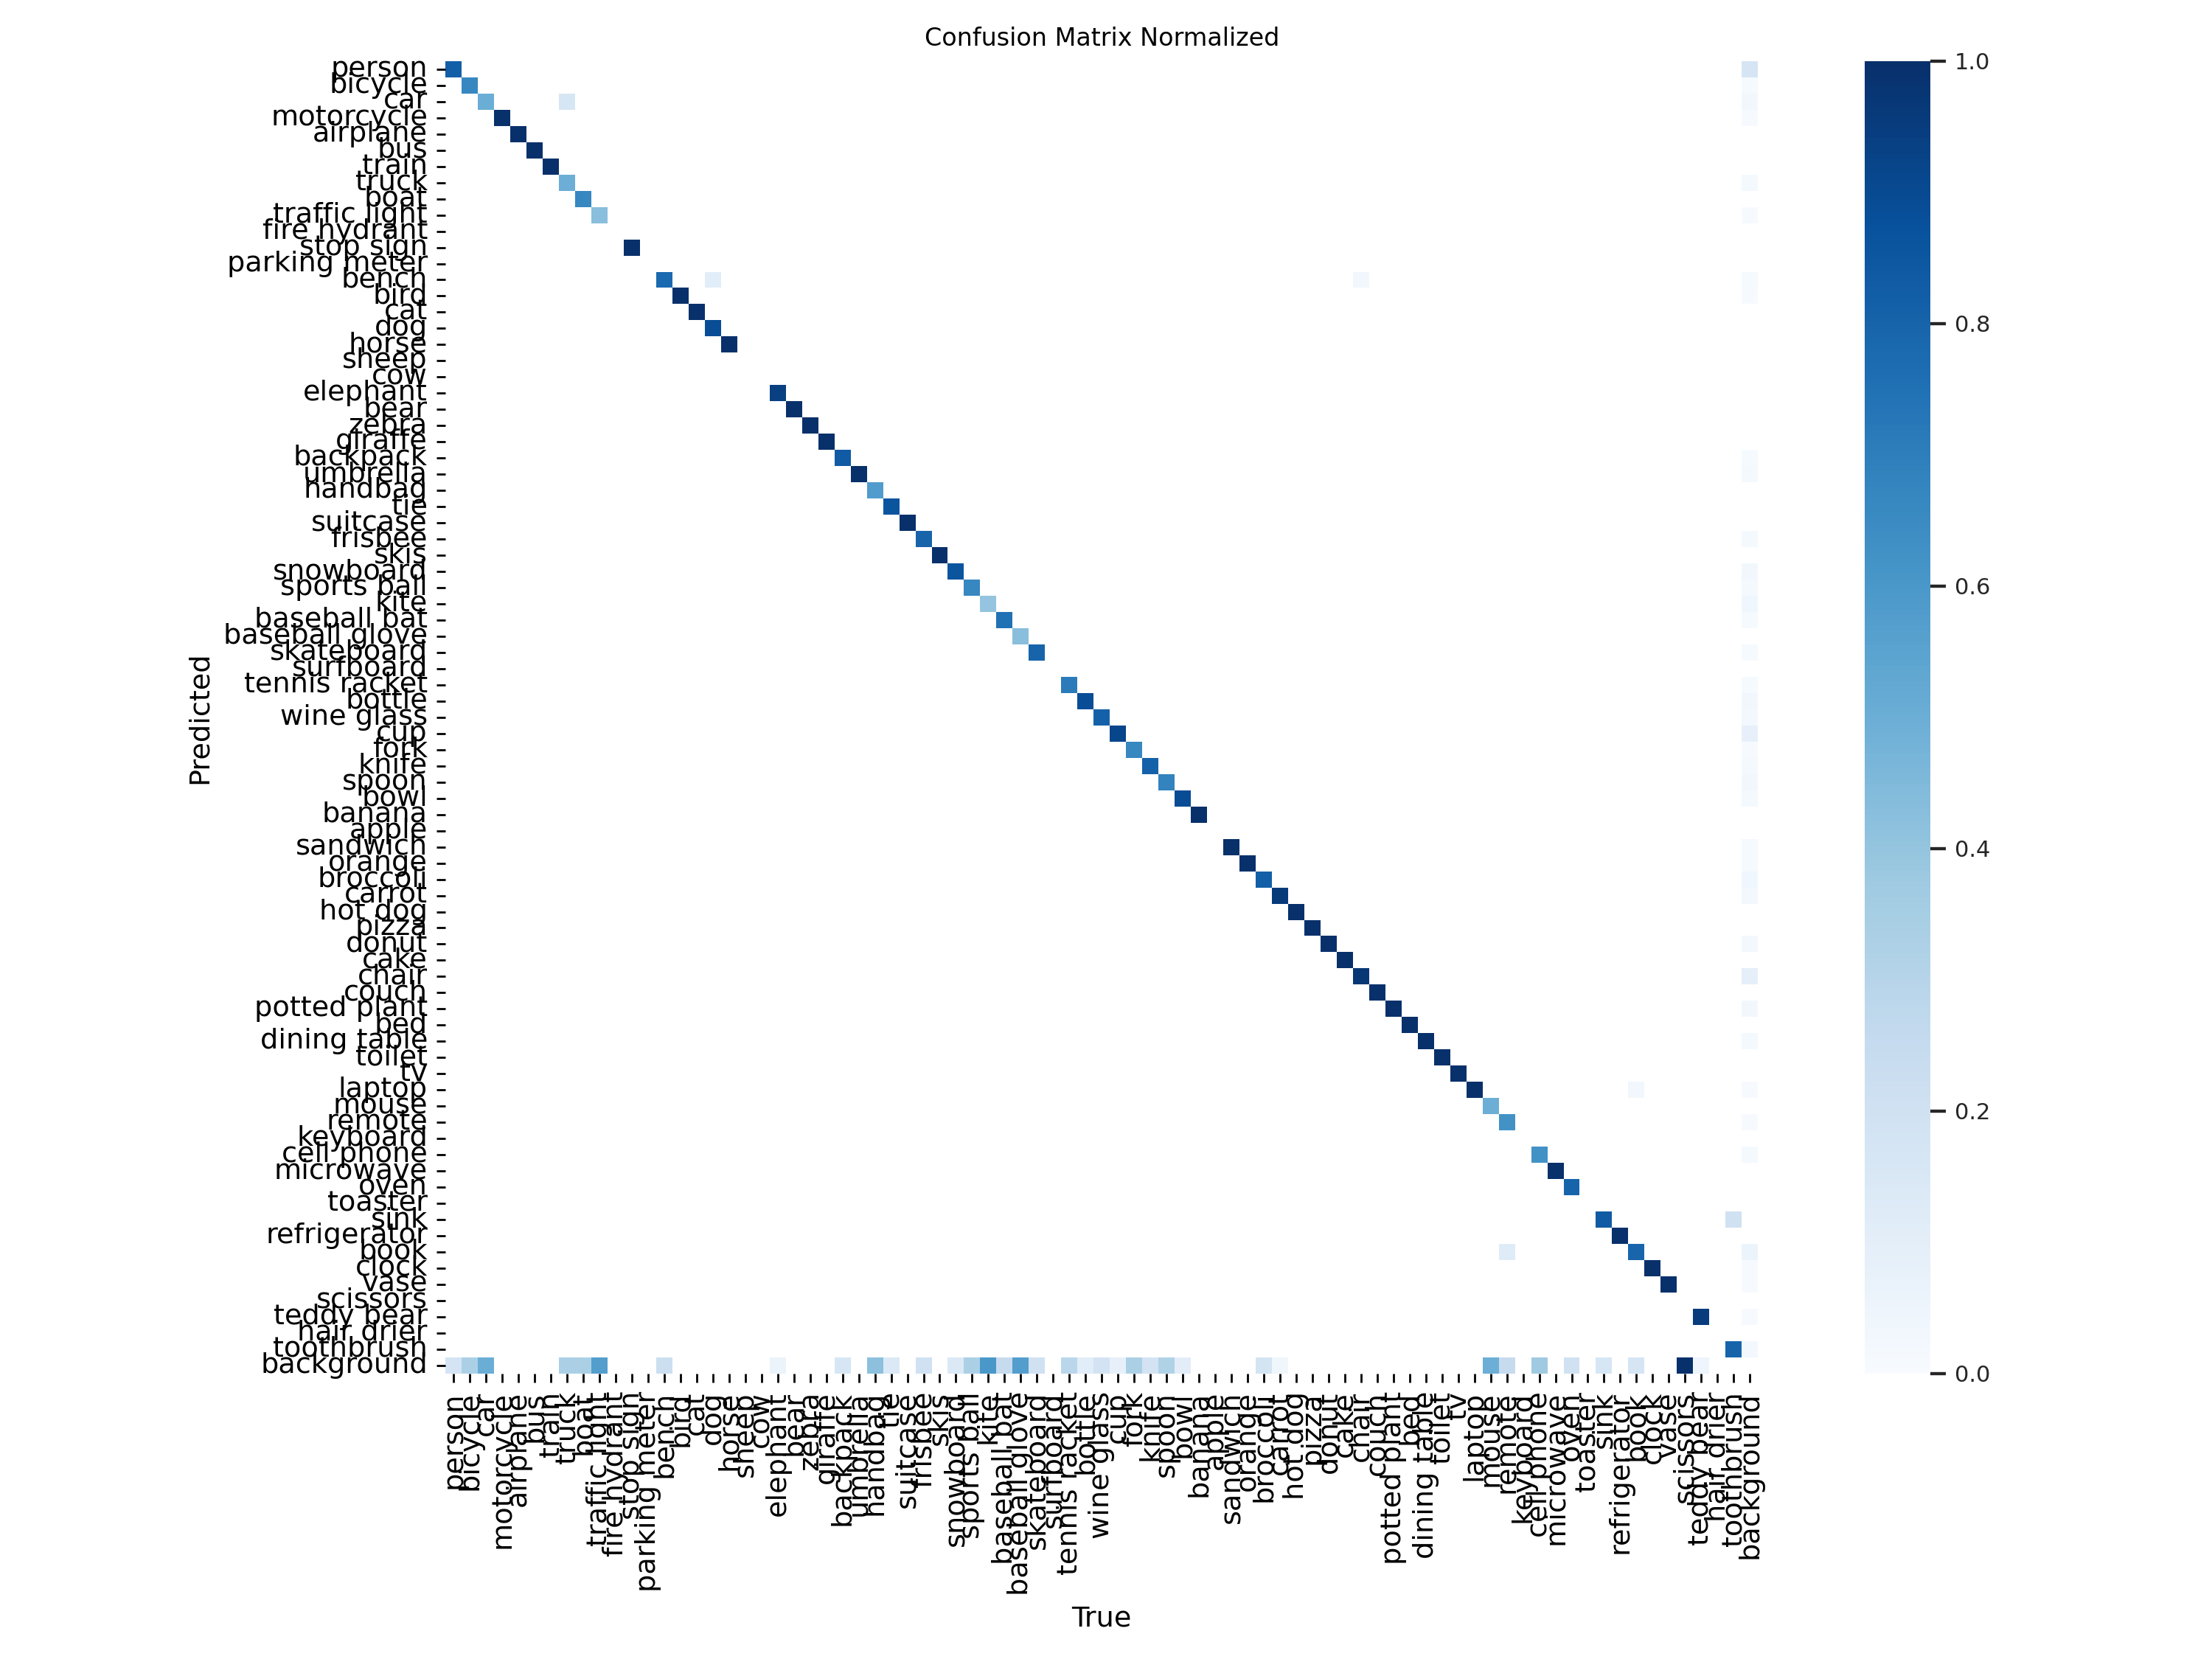

In [ ]:
Image(filename='/content/drive/MyDrive/Dataset/runs/detect/train/confusion_matrix_normalized.png', width=600)

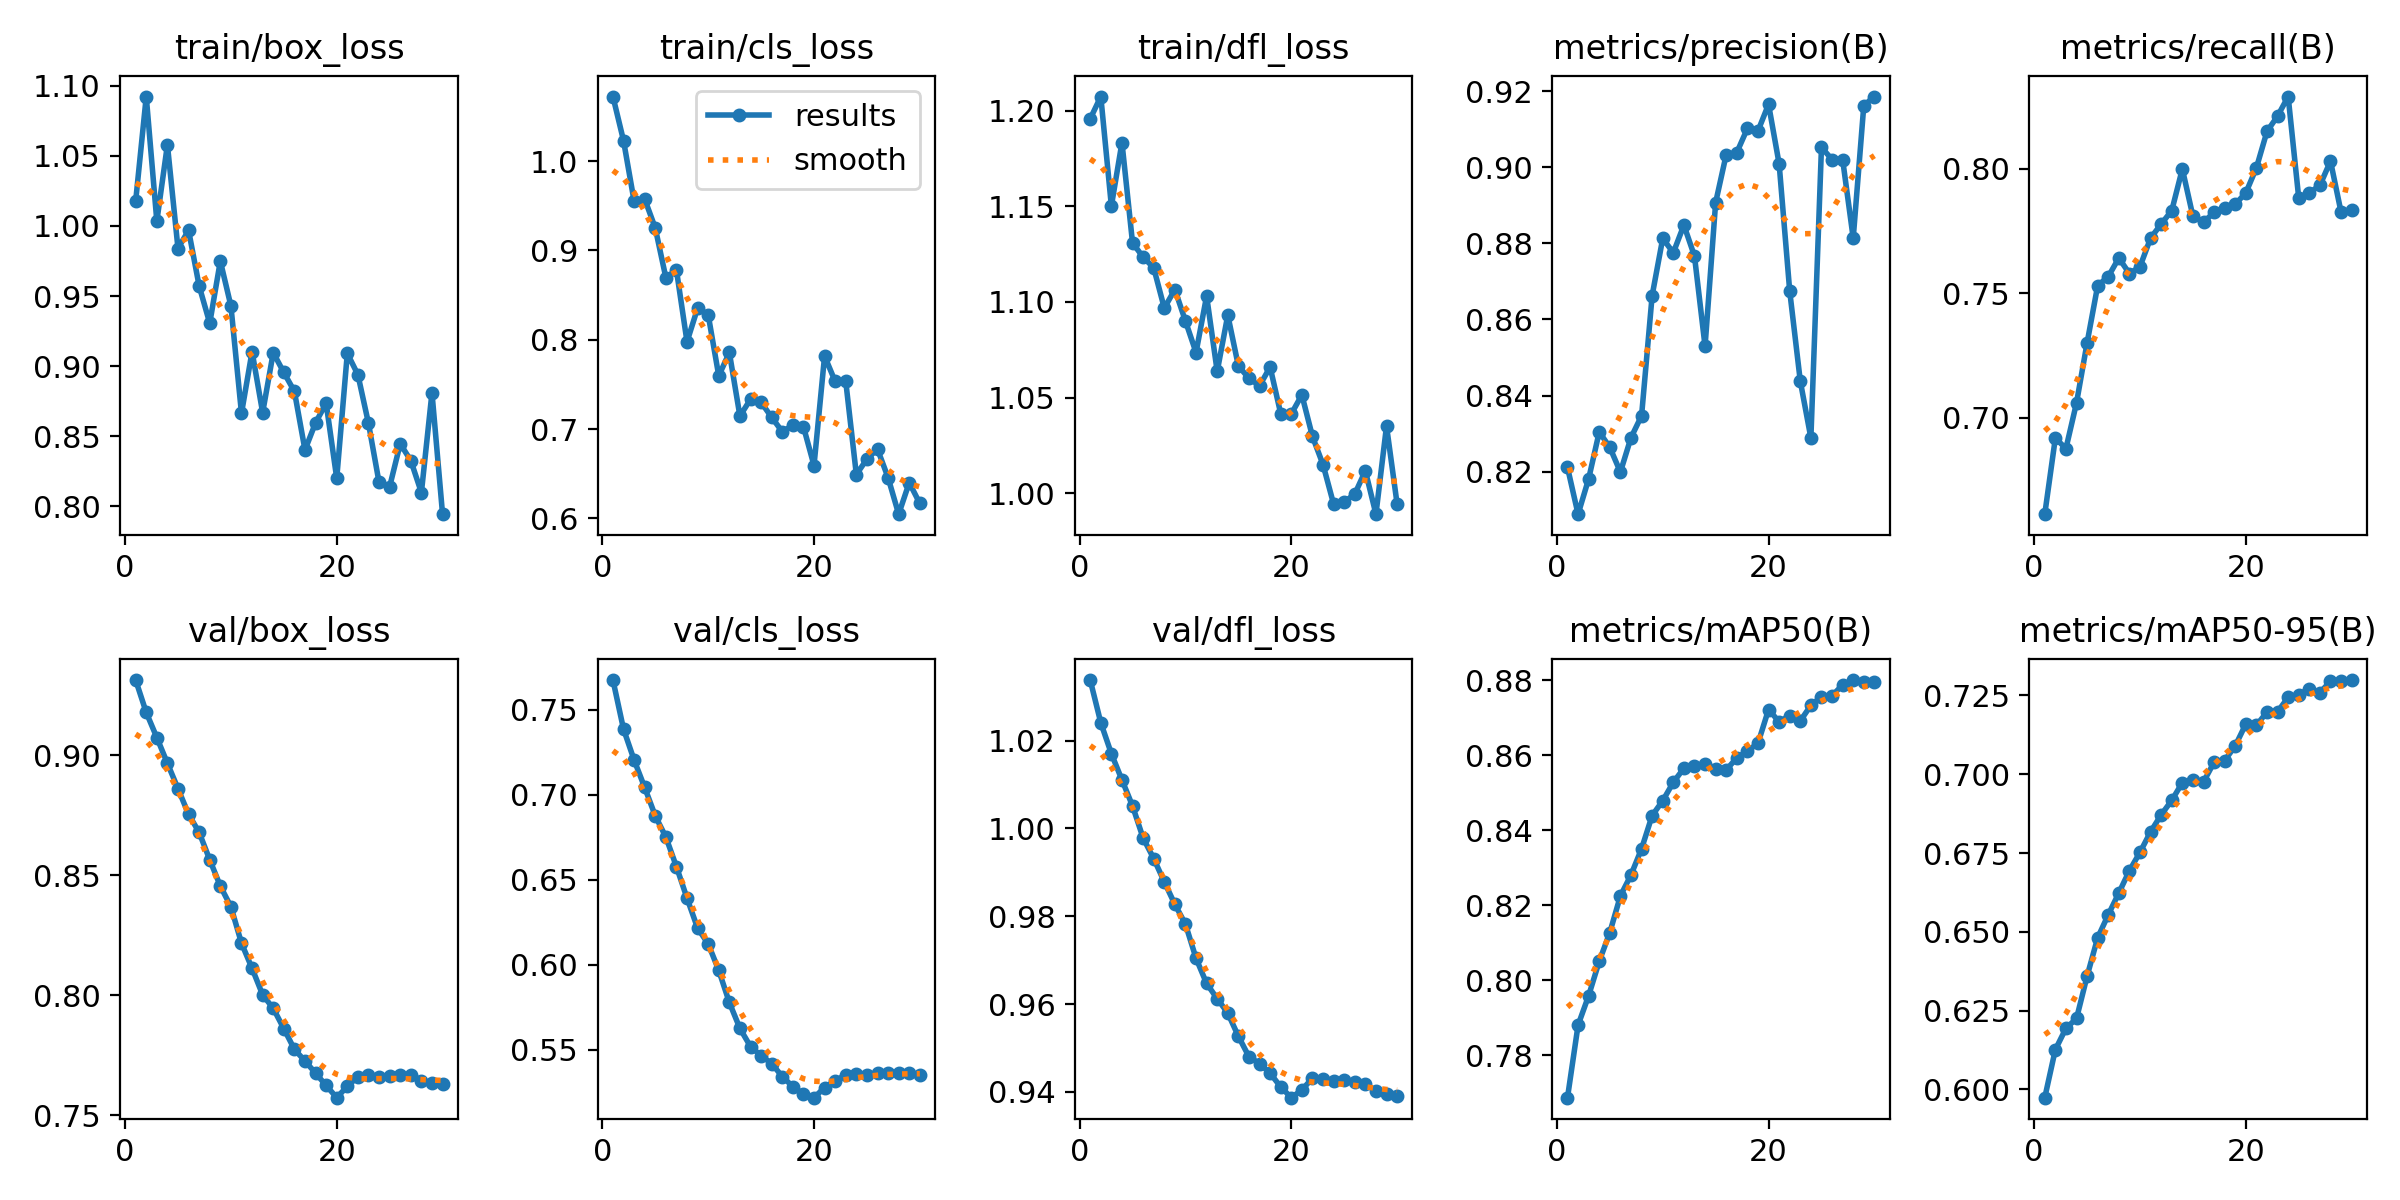

In [ ]:
Image(filename='/content/drive/MyDrive/Dataset/runs/detect/train/results.png', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt data=coco128.yaml

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.60it/s]
                   all        128        929      0.915      0.782      0.878      0.728
                person         61        254      0.976      0.639      0.882      0.698
               bicycle          3          6      0.919      0.667      0.711      0.488
                   car         12         46      0.931      0.261      0.568      0.294
            motorcycle          4          5      0.934          1      0.995      0.868
              airplane          5          6      0.944          1      0.995      0.861
                   bus          5          7

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt" conf=0.50 source=/content/drive/MyDrive/Dataset/Dataset/val/images save=True show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new0.jpg: 640x576 2 persons, 1 motorcycle, 39.2ms
image 2/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new113.jpg: 640x576 3 persons, 16.1ms
image 3/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new115.jpg: 576x640 2 persons, 1 motorcycle, 1 backpack, 37.9ms
image 4/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new127.jpg: 640x640 2 persons, 2 motorcycles, 17.1ms
image 5/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new137.jpg: 640x352 1 person, 1 motorcycle, 39.1ms
image 6/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new26.jpg: 384x640 1 person, 1 motorcycle, 40.2ms
image 7/20 /content/drive/MyDrive/Dataset/Dataset/val/images/new28.jpg: 640x480 1 person,

**NOTE:** Let's take a look at few results.

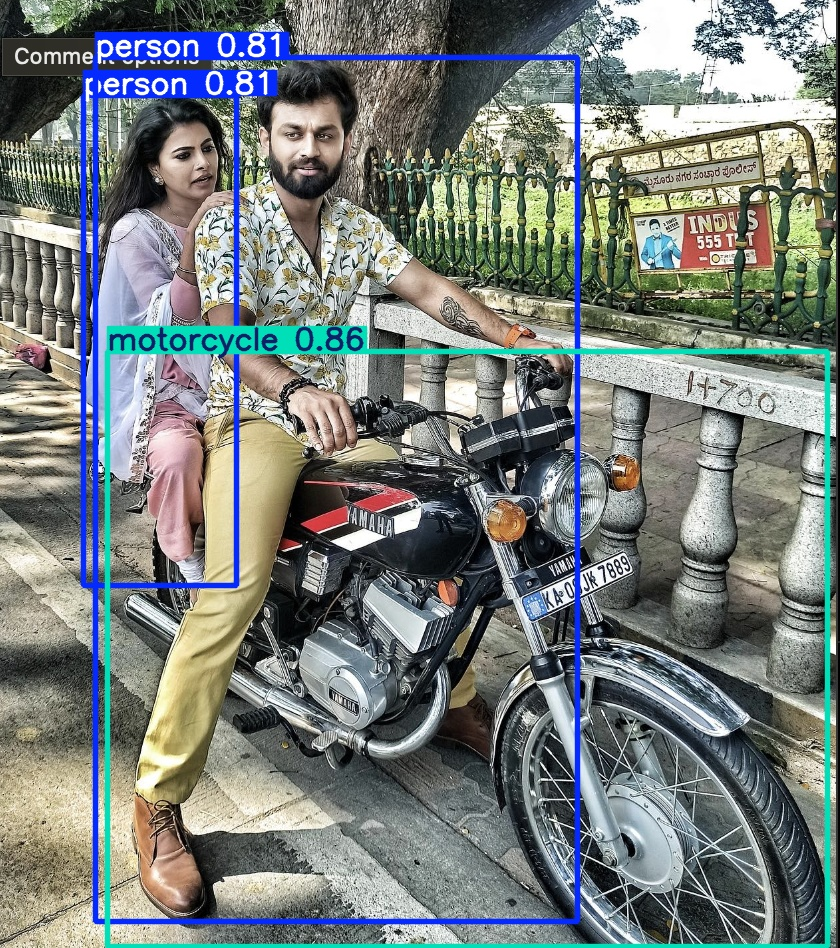

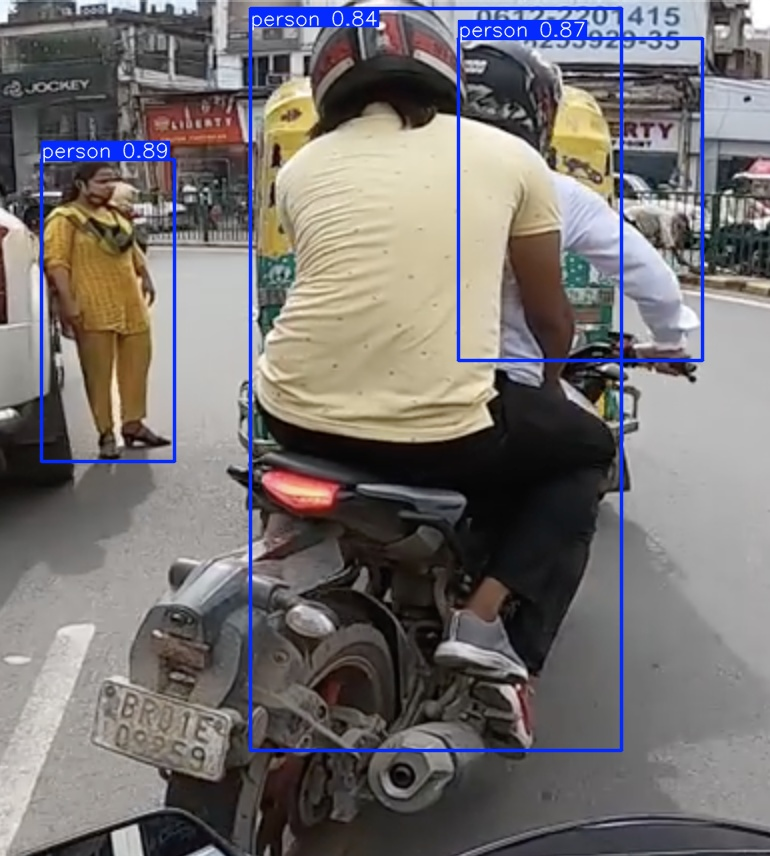

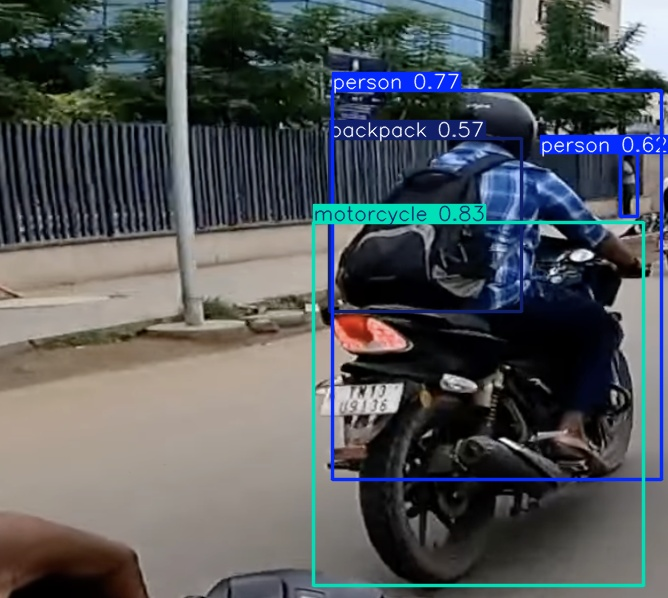

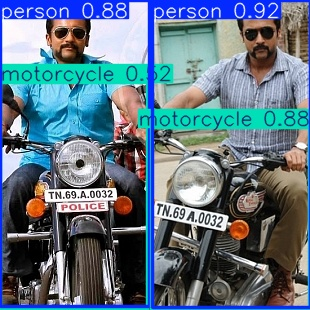

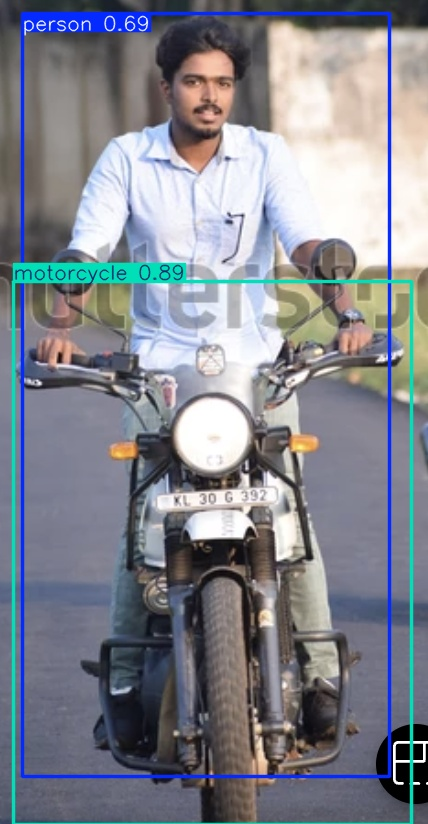

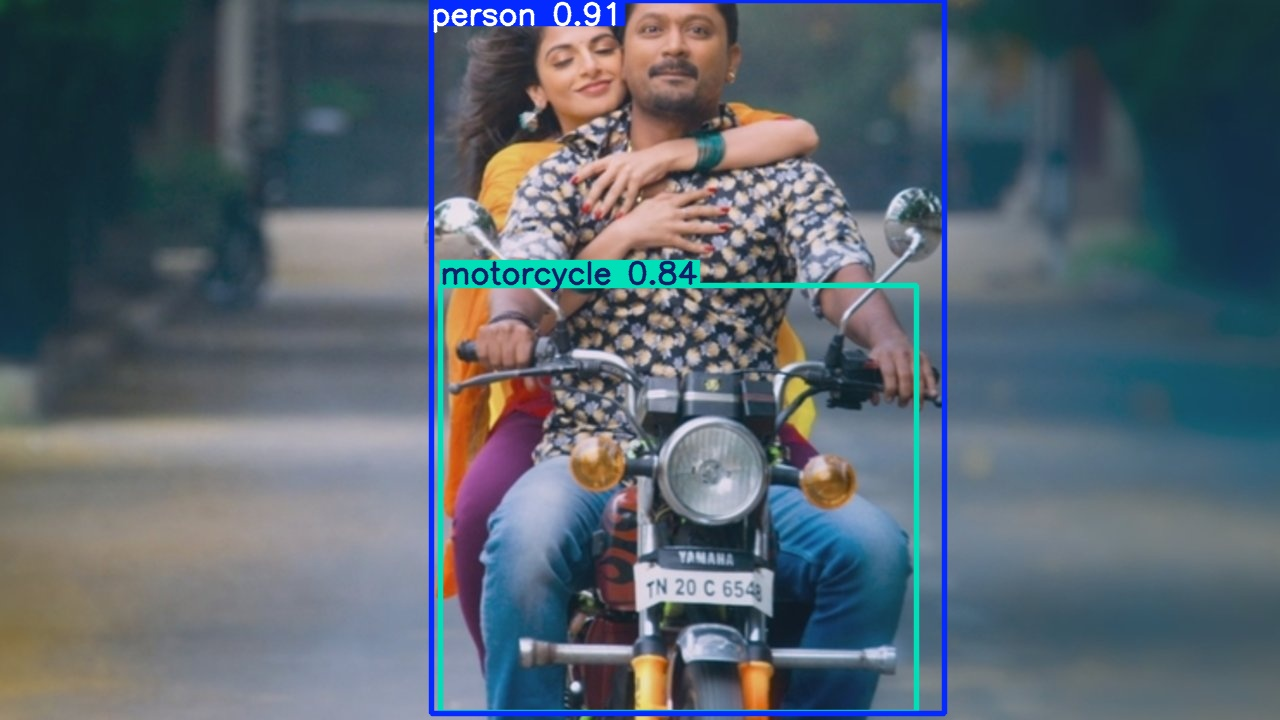

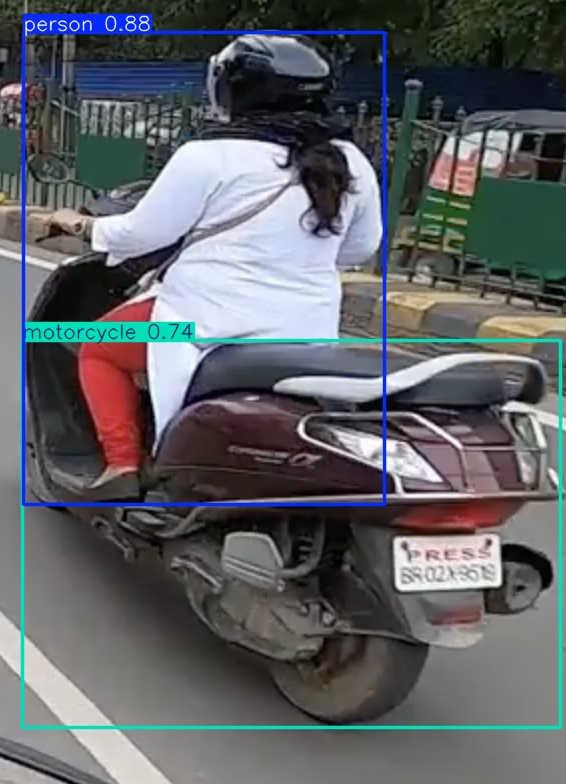

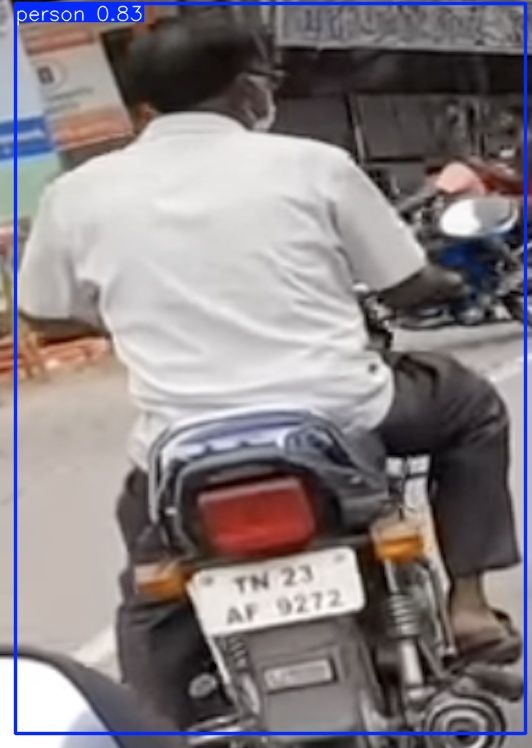

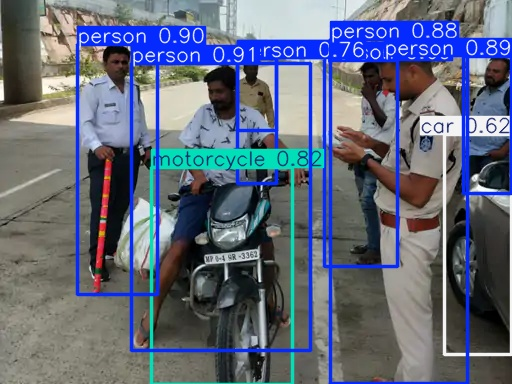

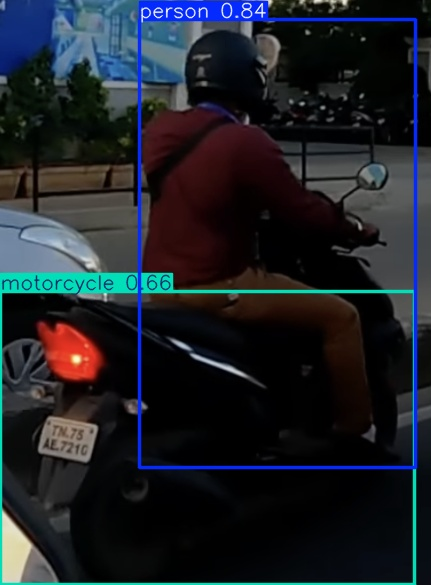

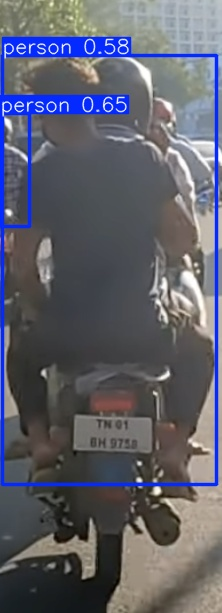

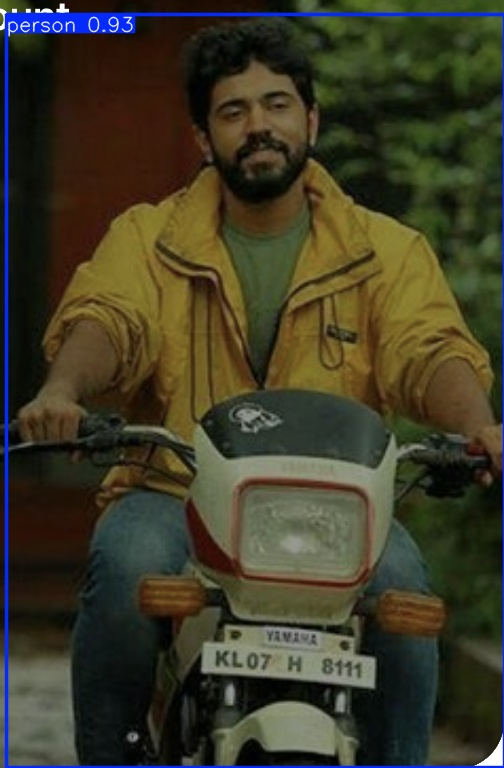

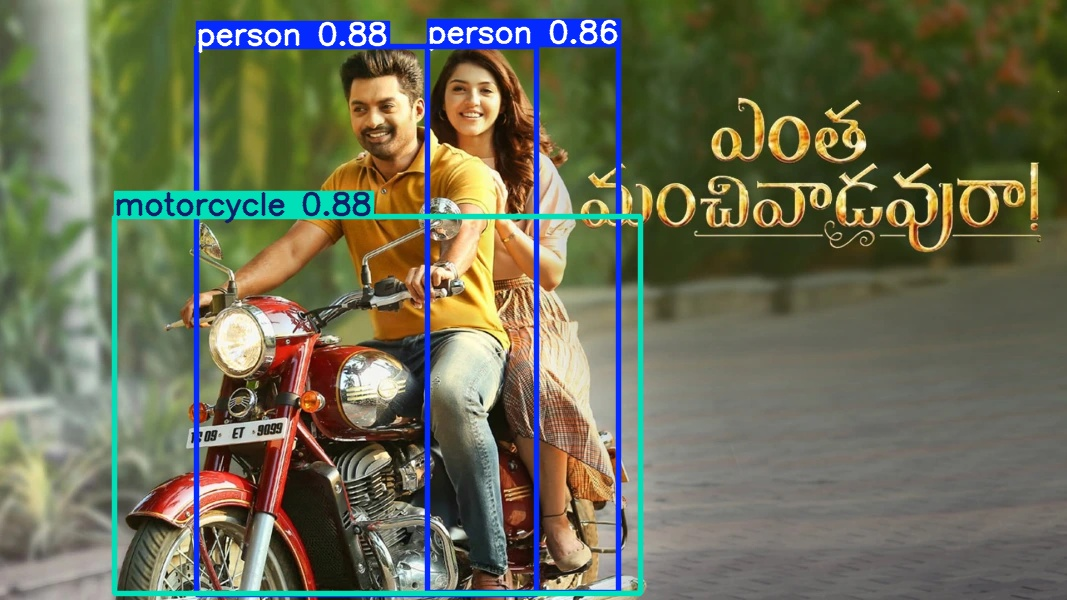

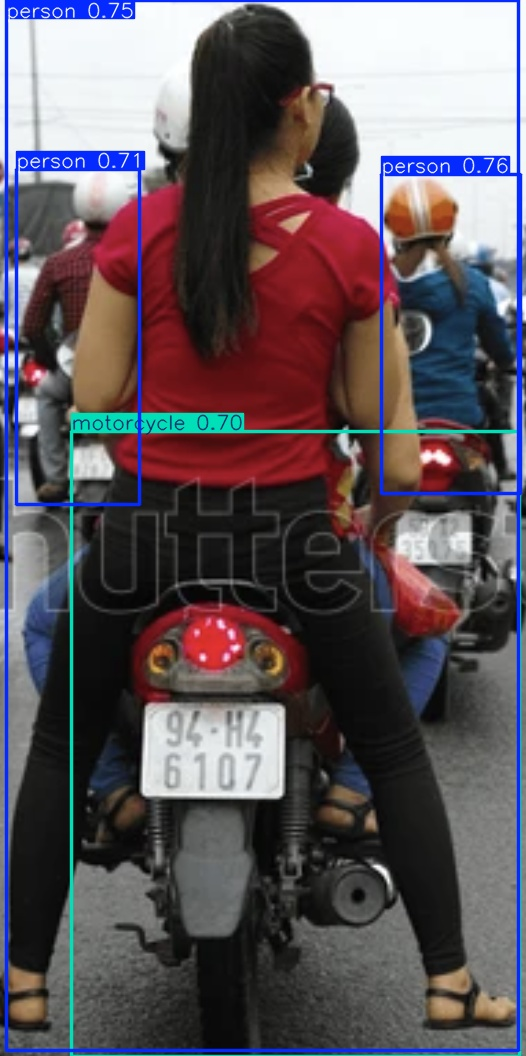

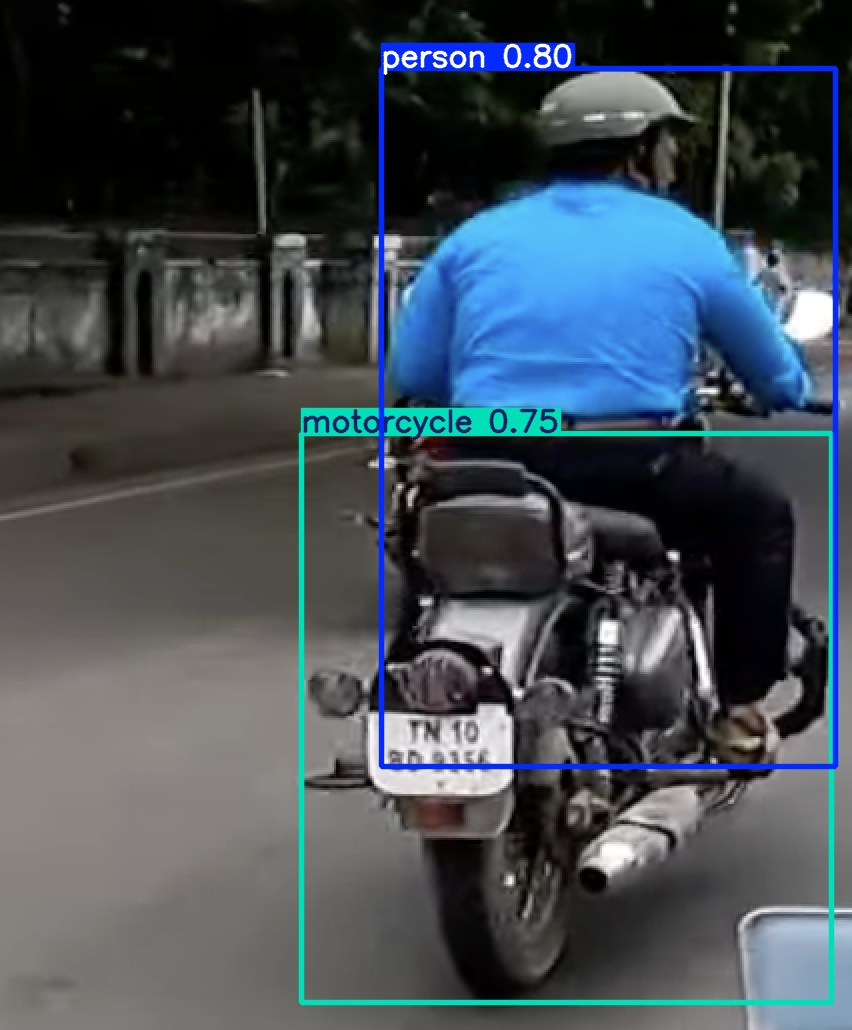

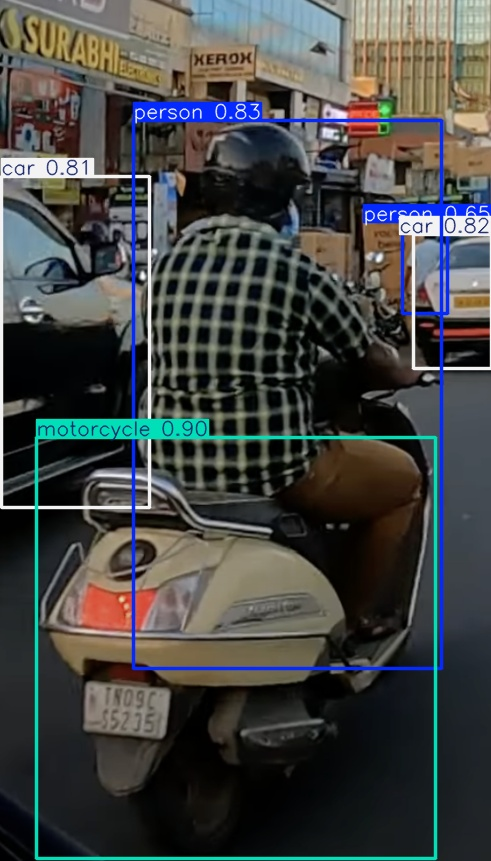

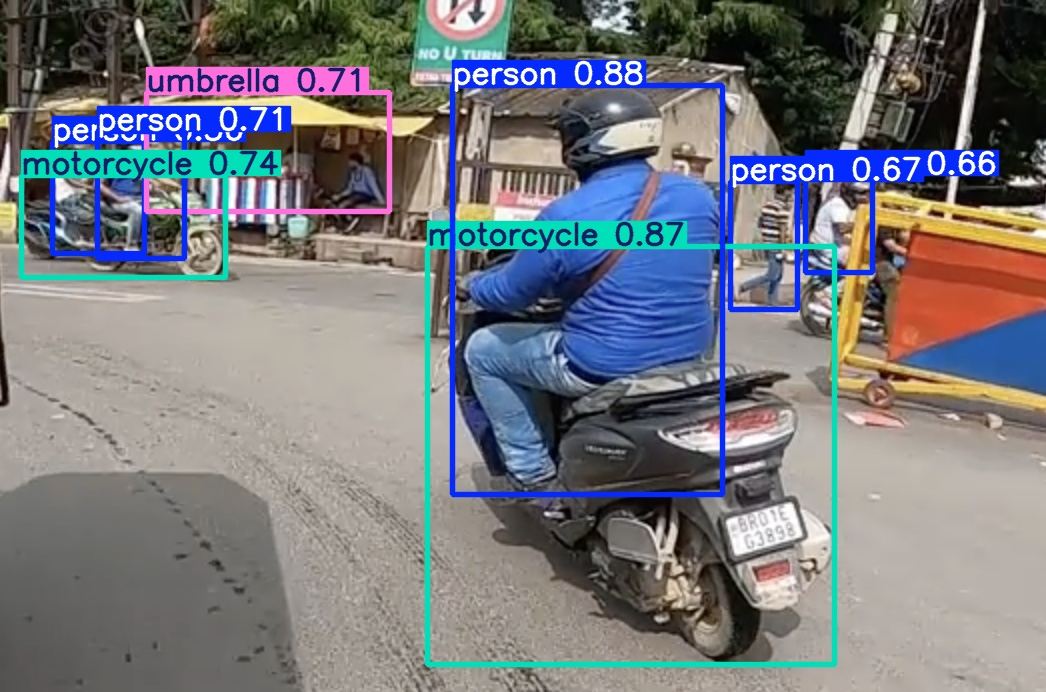

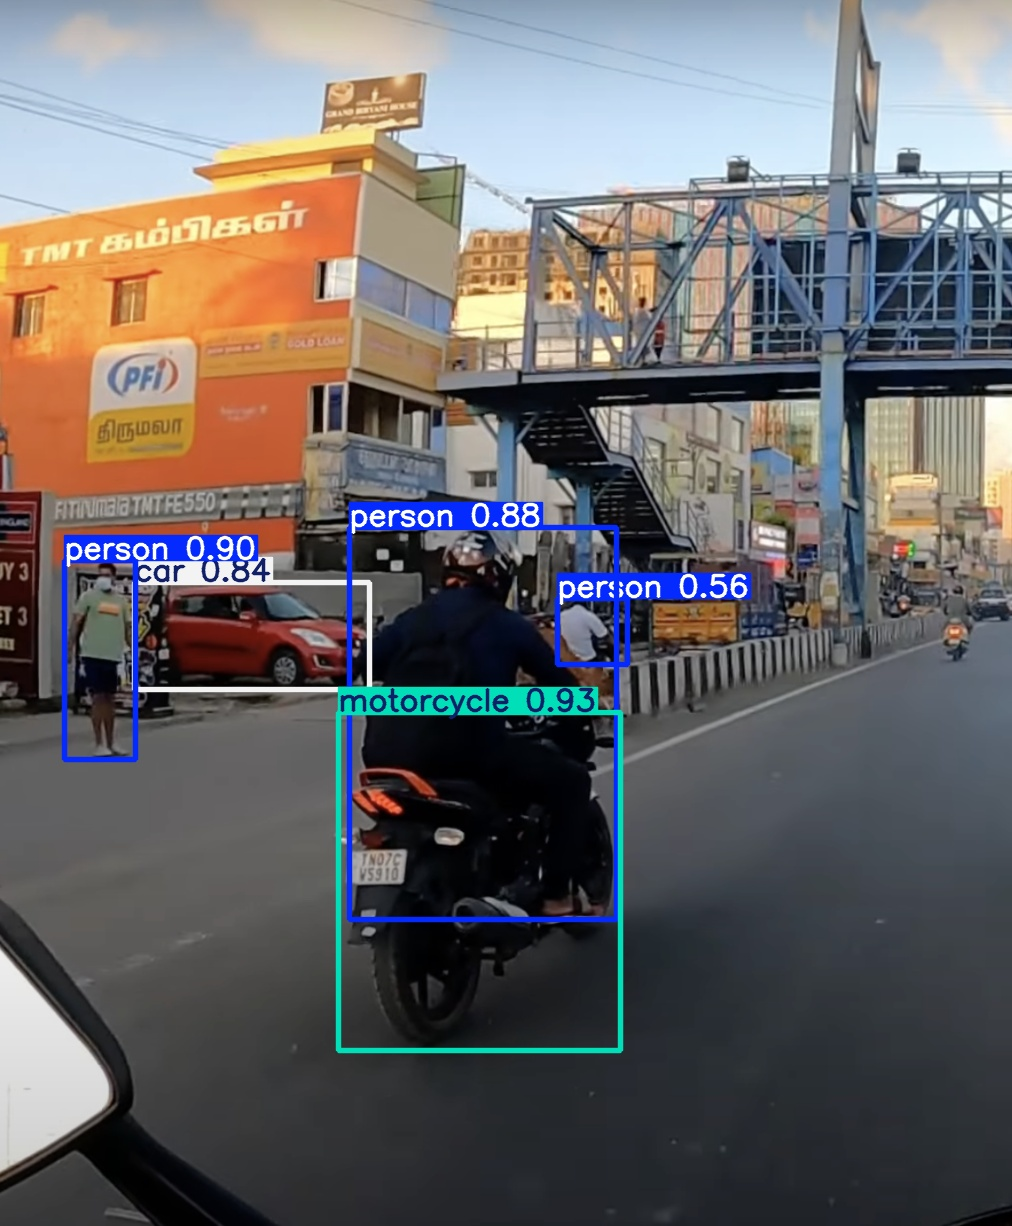

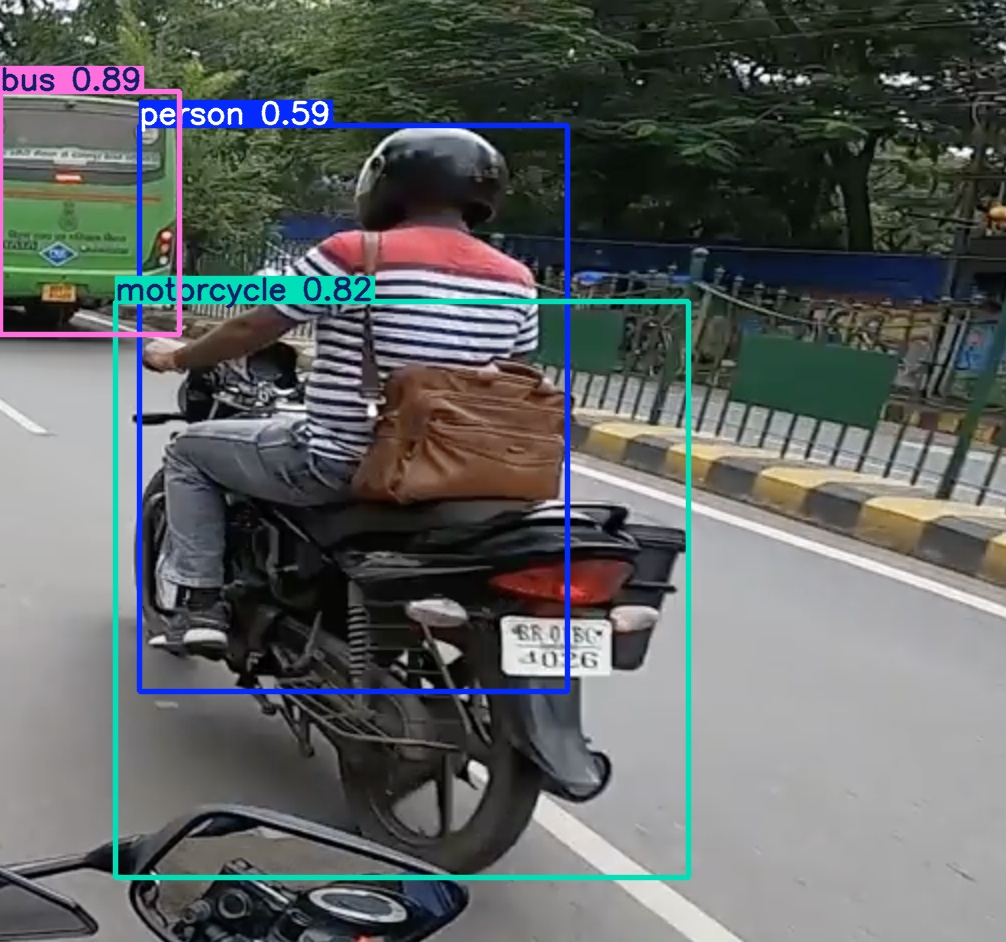

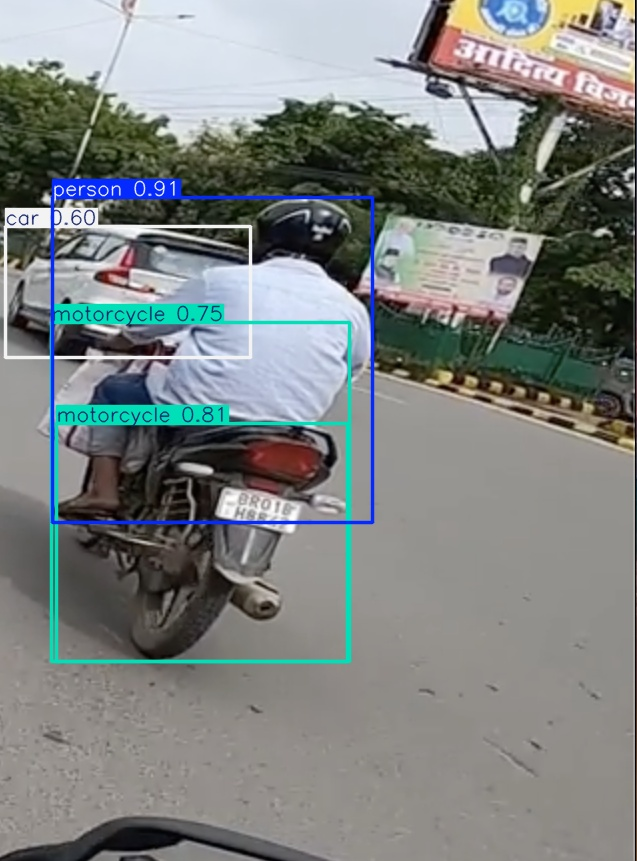

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Dataset/runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=500))
      print("\n")